Training MoE for task: -dl
Device: cpu
Epochs: 25
Loading gradient dataset for -dl task...


100%|██████████| 1000/1000 [00:04<00:00, 201.59it/s]


Loaded 1000 real samples for -dl task
Train samples: 800, Val samples: 200


C:\Users\Anurag Dutta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\nn\init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Created MoE model with 95324789 parameters
Starting MoE training for 25 epochs...


Epoch [1/25] - Train Loss: 0.4897, Train Acc: 0.9153, Val Loss: 0.4829, Val Acc: 0.9752


Epoch [2/25] - Train Loss: 0.2694, Train Acc: 0.9727, Val Loss: 0.1909, Val Acc: 0.9740


Epoch [3/25] - Train Loss: 0.1627, Train Acc: 0.9757, Val Loss: 0.2023, Val Acc: 0.9554


Epoch [4/25] - Train Loss: 0.1317, Train Acc: 0.9762, Val Loss: 0.1415, Val Acc: 0.9733


Epoch [5/25] - Train Loss: 0.1189, Train Acc: 0.9763, Val Loss: 0.1176, Val Acc: 0.9752


Epoch [6/25] - Train Loss: 0.1112, Train Acc: 0.9763, Val Loss: 0.1136, Val Acc: 0.9752


Epoch [7/25] - Train Loss: 0.1085, Train Acc: 0.9763, Val Loss: 0.1114, Val Acc: 0.9752


Epoch [8/25] - Train Loss: 0.1079, Train Acc: 0.9757, Val Loss: 0.1146, Val Acc: 0.9752


Epoch [9/25] - Train Loss: 0.0995, Train Acc: 0.9762, Val Loss: 0.1104, Val Acc: 0.9751


Epoch [10/25] - Train Loss: 0.0923, Train Acc: 0.9765, Val Loss: 0.1096, Val Acc: 0.9751


Epoch [11/25] - Train Loss: 0.0854, Train Acc: 0.9771, Val Loss: 0.1119, Val Acc: 0.9749


Epoch [12/25] - Train Loss: 0.0788, Train Acc: 0.9783, Val Loss: 0.1128, Val Acc: 0.9747


Epoch [13/25] - Train Loss: 0.0699, Train Acc: 0.9812, Val Loss: 0.1172, Val Acc: 0.9747


Epoch [14/25] - Train Loss: 0.0615, Train Acc: 0.9850, Val Loss: 0.1179, Val Acc: 0.9732


Epoch [15/25] - Train Loss: 0.0548, Train Acc: 0.9878, Val Loss: 0.1207, Val Acc: 0.9740


Epoch [16/25] - Train Loss: 0.0489, Train Acc: 0.9894, Val Loss: 0.1230, Val Acc: 0.9729


Epoch [17/25] - Train Loss: 0.0456, Train Acc: 0.9902, Val Loss: 0.1272, Val Acc: 0.9698


Epoch [18/25] - Train Loss: 0.0412, Train Acc: 0.9913, Val Loss: 0.1252, Val Acc: 0.9719


Epoch [19/25] - Train Loss: 0.0397, Train Acc: 0.9917, Val Loss: 0.1247, Val Acc: 0.9721


Epoch [20/25] - Train Loss: 0.0379, Train Acc: 0.9919, Val Loss: 0.1269, Val Acc: 0.9722


Epoch [21/25] - Train Loss: 0.0389, Train Acc: 0.9915, Val Loss: 0.1256, Val Acc: 0.9724


Epoch [22/25] - Train Loss: 0.0348, Train Acc: 0.9922, Val Loss: 0.1288, Val Acc: 0.9717


Epoch [23/25] - Train Loss: 0.0331, Train Acc: 0.9927, Val Loss: 0.1308, Val Acc: 0.9718


Epoch [24/25] - Train Loss: 0.0331, Train Acc: 0.9929, Val Loss: 0.1311, Val Acc: 0.9713


Epoch [25/25] - Train Loss: 0.0305, Train Acc: 0.9933, Val Loss: 0.1319, Val Acc: 0.9715


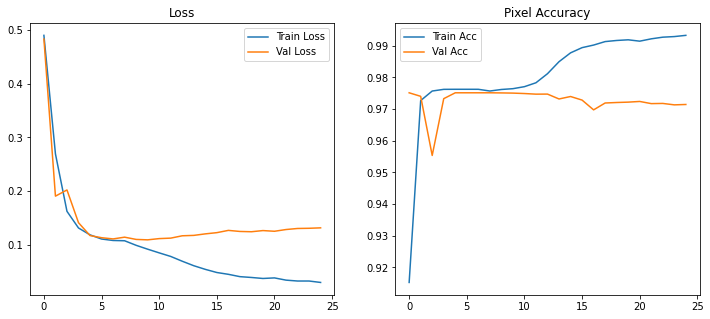

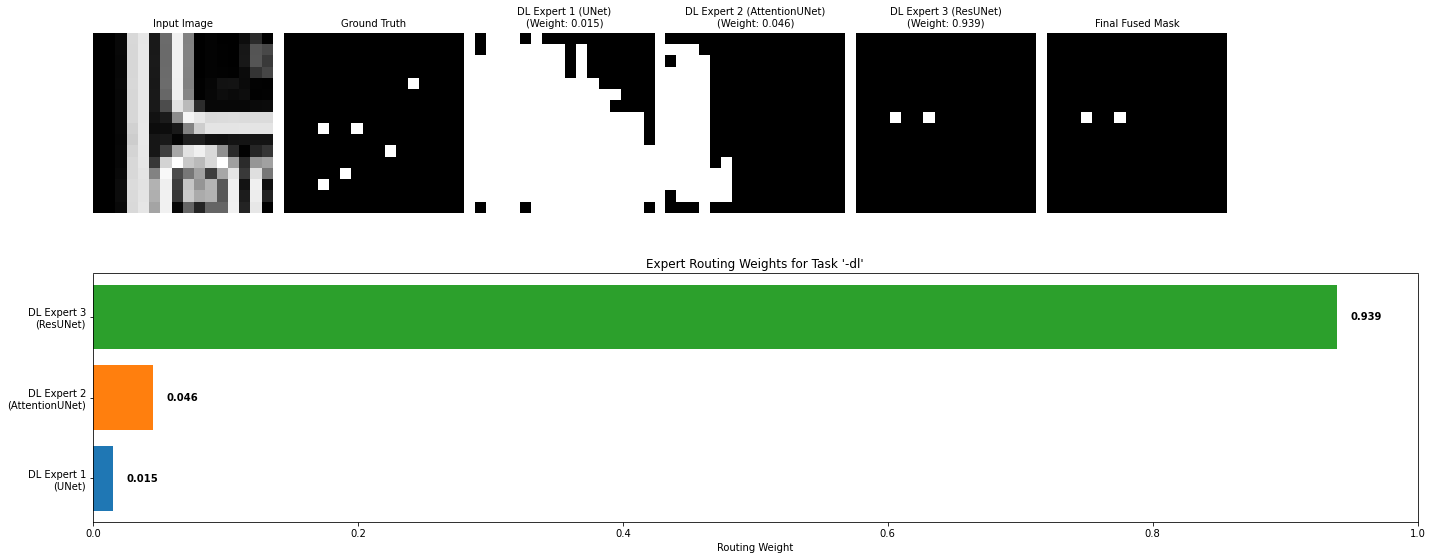


=== MoE Expert Analysis for Task '-dl' ===
DL Expert 1 (UNet): 0.015 (Low contribution)
DL Expert 2 (AttentionUNet): 0.046 (Low contribution)
DL Expert 3 (ResUNet): 0.939 (High contribution)
Total weight sum: 1.000 (should be 1.0)



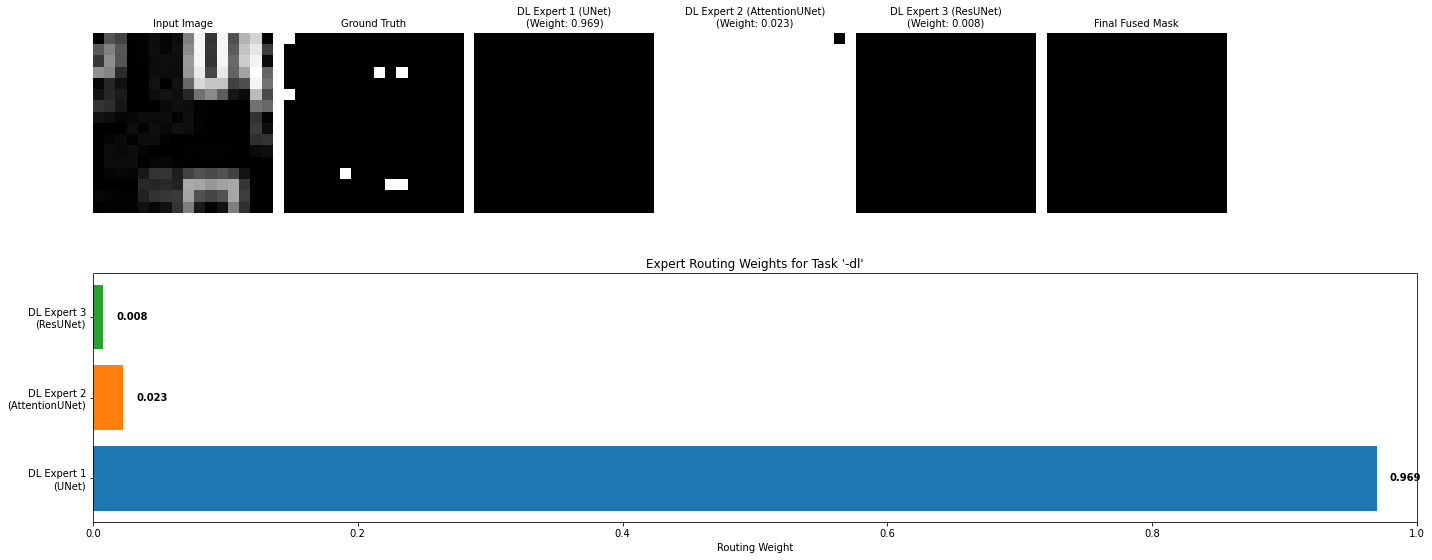


=== MoE Expert Analysis for Task '-dl' ===
DL Expert 1 (UNet): 0.969 (High contribution)
DL Expert 2 (AttentionUNet): 0.023 (Low contribution)
DL Expert 3 (ResUNet): 0.008 (Low contribution)
Total weight sum: 1.000 (should be 1.0)



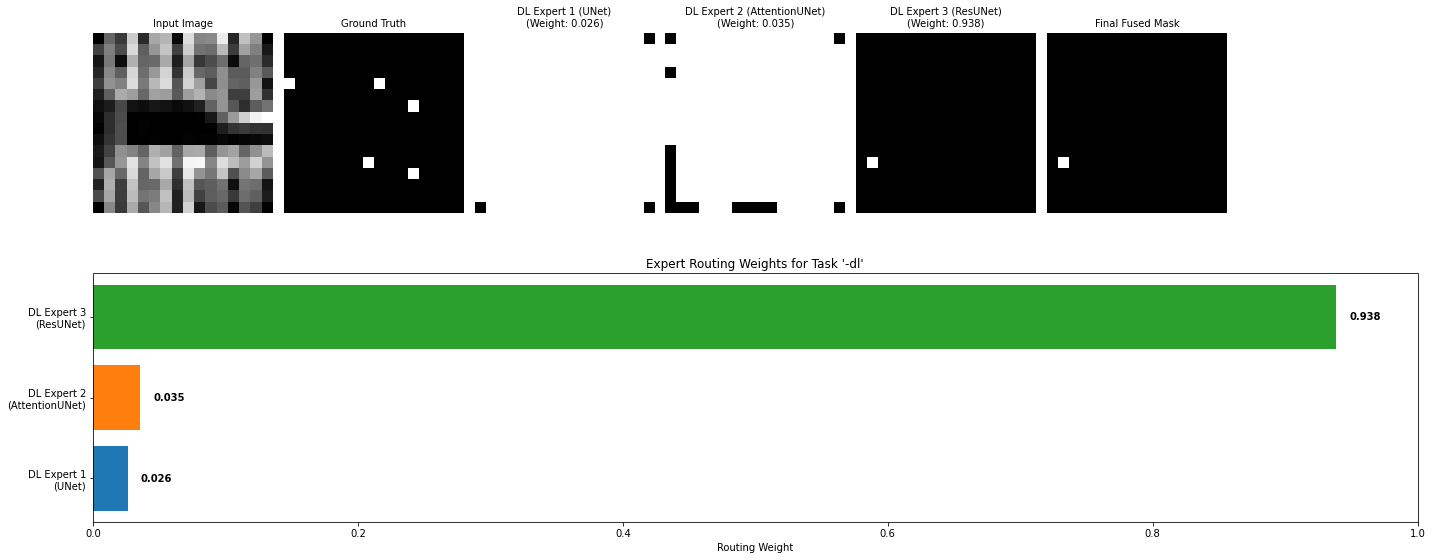


=== MoE Expert Analysis for Task '-dl' ===
DL Expert 1 (UNet): 0.026 (Low contribution)
DL Expert 2 (AttentionUNet): 0.035 (Low contribution)
DL Expert 3 (ResUNet): 0.938 (High contribution)
Total weight sum: 1.000 (should be 1.0)

MoE training and expert analysis completed!


In [ ]:
import os
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

# CONFIG
TASK = "-dl"
IMG_SIZE = 96
BASE_DIR = "."
TRAINVAL_FILE = "trainval.txt"
EPOCHS = 25
BATCH_SIZE = 32
DEVICE = torch.device("cpu" if torch.cuda.is_available() else "cpu")

print(f"Training MoE for task: {TASK}")
print(f"Device: {DEVICE}")
print(f"Epochs: {EPOCHS}")

def pixel_accuracy(preds, masks):
    return (preds == masks).sum().item() / masks.numel()

def display_results(train_losses, val_losses, train_accs, val_accs):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.legend()
    plt.title("Loss")
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label="Train Acc")
    plt.plot(val_accs, label="Val Acc")
    plt.legend()
    plt.title("Pixel Accuracy")
    plt.show()

def display_prediction(image, true_mask, pred_mask):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image.transpose(1, 2, 0))
    plt.title("Input Image")
    plt.subplot(1, 3, 2)
    plt.imshow(true_mask)
    plt.title("True Mask")
    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask)
    plt.title("Predicted Mask")
    plt.show()

def display_moe_expert_combination(image, true_mask, expert_masks, expert_weights, final_mask, expert_names, task_flag):
    num_experts = len(expert_masks)
    fig = plt.figure(figsize=(20, 8))
    total_cols = 3 + num_experts + 1
    plt.subplot(2, total_cols, 1)
    plt.imshow(image.transpose(1, 2, 0))
    plt.title("Input Image", fontsize=10)
    plt.axis('off')
    plt.subplot(2, total_cols, 2)
    plt.imshow(true_mask, cmap='jet' if task_flag == '-dc' else 'gray')
    plt.title("Ground Truth", fontsize=10)
    plt.axis('off')
    for i, (mask, name, weight) in enumerate(zip(expert_masks, expert_names, expert_weights)):
        plt.subplot(2, total_cols, 3 + i)
        plt.imshow(mask, cmap='jet' if task_flag == '-dc' else 'gray')
        plt.title(f"{name}\n(Weight: {weight:.3f})", fontsize=10)
        plt.axis('off')
    plt.subplot(2, total_cols, 3 + num_experts)
    plt.imshow(final_mask, cmap='jet' if task_flag == '-dc' else 'gray')
    plt.title("Final Fused Mask", fontsize=10)
    plt.axis('off')
    ax_weights = plt.subplot(2, 1, 2)
    y_pos = np.arange(len(expert_names))
    bars = ax_weights.barh(y_pos, expert_weights, align='center', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    ax_weights.set_yticks(y_pos)
    ax_weights.set_yticklabels([name.replace(' (', '\n(') for name in expert_names])
    ax_weights.set_xlabel("Routing Weight")
    ax_weights.set_title(f"Expert Routing Weights for Task '{task_flag}'")
    ax_weights.set_xlim(0, 1)
    for i, (bar, weight) in enumerate(zip(bars, expert_weights)):
        ax_weights.text(weight + 0.01, i, f"{weight:.3f}", va='center', fontweight='bold')
    plt.tight_layout()
    plt.show()
    print(f"\n=== MoE Expert Analysis for Task '{task_flag}' ===")
    for i, (name, weight) in enumerate(zip(expert_names, expert_weights)):
        contribution = "High" if weight > 0.4 else "Medium" if weight > 0.25 else "Low"
        print(f"{name}: {weight:.3f} ({contribution} contribution)")
    print(f"Total weight sum: {sum(expert_weights):.3f} (should be 1.0)")
    print()

class DefectDataset(Dataset):
    def __init__(self, base_path, file_list_path, img_size):
        with open(os.path.join(base_path, file_list_path), "r") as f:
            lines = f.readlines()
        self.images, self.masks = [], []
        print(f"Loading dataset for {TASK} task...")
        for line in tqdm(lines):
            img_path_rel, ann_path_rel = line.strip().split()
            img_path_full = os.path.join(base_path, img_path_rel.replace(".jpg", "_test.jpg"))
            ann_path_full = os.path.join(base_path, ann_path_rel)
            img = Image.open(img_path_full).convert("RGB")
            orig_size = img.size
            img = img.resize((img_size, img_size), Image.Resampling.LANCZOS)
            self.images.append(np.array(img, dtype=np.float32) / 255.0)
            mask = np.zeros((img_size, img_size), dtype=np.int64)
            scale_x, scale_y = img_size / orig_size[0], img_size / orig_size[1]
            with open(ann_path_full, "r") as f_ann:
                for l in f_ann:
                    parts = l.strip().split()
                    if len(parts) < 5: continue
                    x1, y1, x2, y2, class_id = map(int, parts)
                    nx1, ny1 = max(0, int(x1 * scale_x)), max(0, int(y1 * scale_y))
                    nx2, ny2 = min(img_size - 1, int(x2 * scale_x)), min(img_size - 1, int(y2 * scale_y))
                    if ny1 < ny2 and nx1 < nx2:
                        mask[ny1:ny2, nx1:nx2] = class_id if TASK == "-dc" else (1 if class_id > 0 else 0)
            self.masks.append(mask)
    def __len__(self):
        return len(self.images)
    def __getitem__(self, idx):
        img = torch.tensor(self.images[idx].transpose(2, 0, 1), dtype=torch.float32)
        mask = torch.tensor(self.masks[idx], dtype=torch.long)
        return img, mask

class GradientDefectDataset(Dataset):
    def __init__(self, base_path, file_list_path, img_size):
        with open(os.path.join(base_path, file_list_path), "r") as f:
            lines = f.readlines()
        self.images, self.masks = [], []
        print(f"Loading gradient dataset for {TASK} task...")
        for line in tqdm(lines):
            img_path_rel, ann_path_rel = line.strip().split()
            img_path_full = os.path.join(base_path, img_path_rel.replace(".jpg", "_test.jpg"))
            ann_path_full = os.path.join(base_path, ann_path_rel)
            img = Image.open(img_path_full).convert("RGB")
            orig_size = img.size
            img = img.resize((img_size, img_size), Image.Resampling.LANCZOS)
            img_np = np.array(img, dtype=np.float32) / 255.0
            gray = cv2.cvtColor((img_np*255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
            grad_x = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
            grad_y = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)
            grad = np.sqrt(grad_x**2 + grad_y**2)
            grad = (grad - grad.min()) / (grad.max() - grad.min() + 1e-8)
            grad = np.stack([grad]*3, axis=2)
            self.images.append(grad.astype(np.float32))
            mask = np.zeros((img_size, img_size), dtype=np.int64)
            scale_x, scale_y = img_size / orig_size[0], img_size / orig_size[1]
            with open(ann_path_full, "r") as f_ann:
                for l in f_ann:
                    parts = l.strip().split()
                    if len(parts) < 5: continue
                    x1, y1, x2, y2, class_id = map(int, parts)
                    if class_id == 0: continue
                    nx1, ny1 = max(0, int(x1 * scale_x)), max(0, int(y1 * scale_y))
                    nx2, ny2 = min(img_size - 1, int(x2 * scale_x)), min(img_size - 1, int(y2 * scale_y))
                    if ny1 < ny2 and nx1 < nx2:
                        mask[ny1:ny2, nx1:nx2] = 1
            self.masks.append(mask)
    def __len__(self):
        return len(self.images)
    def __getitem__(self, idx):
        img = torch.tensor(self.images[idx].transpose(2, 0, 1), dtype=torch.float32)
        mask = torch.tensor(self.masks[idx], dtype=torch.long)
        return img, mask

class UNet_DC1(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.enc1 = self.conv_block(3, 64, 0.2)
        self.enc2 = self.conv_block(64, 128, 0.2)
        self.enc3 = self.conv_block(128, 256, 0.3)
        self.enc4 = self.conv_block(256, 512, 0.3)
        self.bottleneck = self.conv_block(512, 1024, 0.4)
        self.up1 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.dec1 = self.conv_block(1024, 512, 0.3)
        self.up2 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec2 = self.conv_block(512, 256, 0.3)
        self.up3 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec3 = self.conv_block(256, 128, 0.2)
        self.up4 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec4 = self.conv_block(128, 64, 0.2)
        self.out_conv = nn.Conv2d(64, num_classes, 1)
        self.pool = nn.MaxPool2d(2)
    def conv_block(self, in_c, out_c, drop):
        return nn.Sequential(
            nn.Conv2d(in_c, out_c, 3, padding=1, bias=False), nn.BatchNorm2d(out_c), nn.ReLU(inplace=True),
            nn.Dropout2d(drop), nn.Conv2d(out_c, out_c, 3, padding=1, bias=False),
            nn.BatchNorm2d(out_c), nn.ReLU(inplace=True)
        )
    def forward(self, x):
        c1 = self.enc1(x); p1 = self.pool(c1); c2 = self.enc2(p1); p2 = self.pool(c2)
        c3 = self.enc3(p2); p3 = self.pool(c3); c4 = self.enc4(p3); p4 = self.pool(c4)
        b = self.bottleneck(p4)
        u1 = self.up1(b); u1 = torch.cat([u1, c4], dim=1); d1 = self.dec1(u1)
        u2 = self.up2(d1); u2 = torch.cat([u2, c3], dim=1); d2 = self.dec2(u2)
        u3 = self.up3(d2); u3 = torch.cat([u3, c2], dim=1); d3 = self.dec3(u3)
        u4 = self.up4(d3); u4 = torch.cat([u4, c1], dim=1); d4 = self.dec4(u4)
        return self.out_conv(d4)

class AttentionGate(nn.Module):
    def __init__(self, F_g, F_l, F_int):
        super().__init__()
        self.W_g = nn.Sequential(nn.Conv2d(F_g, F_int, kernel_size=1, stride=1, padding=0, bias=True), nn.BatchNorm2d(F_int))
        self.W_x = nn.Sequential(nn.Conv2d(F_l, F_int, kernel_size=1, stride=1, padding=0, bias=True), nn.BatchNorm2d(F_int))
        self.psi = nn.Sequential(nn.Conv2d(F_int, 1, kernel_size=1, stride=1, padding=0, bias=True), nn.BatchNorm2d(1), nn.Sigmoid())
        self.relu = nn.ReLU(inplace=True)
    def forward(self, g, x):
        g1 = self.W_g(g); x1 = self.W_x(x); psi = self.relu(g1 + x1); psi = self.psi(psi)
        return x * psi

class AttentionUNet_DC2(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.enc1 = self.conv_block(3, 64, 0.2); self.enc2 = self.conv_block(64, 128, 0.2)
        self.enc3 = self.conv_block(128, 256, 0.3); self.enc4 = self.conv_block(256, 512, 0.3)
        self.bottleneck = self.conv_block(512, 1024, 0.4)
        self.up1 = nn.ConvTranspose2d(1024, 512, 2, stride=2); self.att1 = AttentionGate(F_g=512, F_l=512, F_int=256)
        self.dec1 = self.conv_block(1024, 512, 0.3)
        self.up2 = nn.ConvTranspose2d(512, 256, 2, stride=2); self.att2 = AttentionGate(F_g=256, F_l=256, F_int=128)
        self.dec2 = self.conv_block(512, 256, 0.3)
        self.up3 = nn.ConvTranspose2d(256, 128, 2, stride=2); self.att3 = AttentionGate(F_g=128, F_l=128, F_int=64)
        self.dec3 = self.conv_block(256, 128, 0.2)
        self.up4 = nn.ConvTranspose2d(128, 64, 2, stride=2); self.att4 = AttentionGate(F_g=64, F_l=64, F_int=32)
        self.dec4 = self.conv_block(128, 64, 0.2)
        self.out_conv = nn.Conv2d(64, num_classes, 1); self.pool = nn.MaxPool2d(2)
    def conv_block(self, in_c, out_c, drop):
        return nn.Sequential(
            nn.Conv2d(in_c, out_c, 3, padding=1, bias=False), nn.BatchNorm2d(out_c), nn.ReLU(inplace=True),
            nn.Dropout2d(drop), nn.Conv2d(out_c, out_c, 3, padding=1, bias=False),
            nn.BatchNorm2d(out_c), nn.ReLU(inplace=True)
        )
    def forward(self, x):
        c1 = self.enc1(x); p1 = self.pool(c1); c2 = self.enc2(p1); p2 = self.pool(c2)
        c3 = self.enc3(p2); p3 = self.pool(c3); c4 = self.enc4(p3); p4 = self.pool(c4); b = self.bottleneck(p4)
        u1 = self.up1(b); a1 = self.att1(g=u1, x=c4); u1 = torch.cat([a1, u1], dim=1); d1 = self.dec1(u1)
        u2 = self.up2(d1); a2 = self.att2(g=u2, x=c3); u2 = torch.cat([a2, u2], dim=1); d2 = self.dec2(u2)
        u3 = self.up3(d2); a3 = self.att3(g=u3, x=c2); u3 = torch.cat([a3, u3], dim=1); d3 = self.dec3(u3)
        u4 = self.up4(d3); a4 = self.att4(g=u4, x=c1); u4 = torch.cat([a4, u4], dim=1); d4 = self.dec4(u4)
        return self.out_conv(d4)

class ResNetBlock(nn.Module):
    def __init__(self, in_c, out_c, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_c, out_c, 3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_c); self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_c, out_c, 3, padding=1, bias=False); self.bn2 = nn.BatchNorm2d(out_c)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_c != out_c:
            self.shortcut = nn.Sequential(nn.Conv2d(in_c, out_c, 1, stride=stride, bias=False), nn.BatchNorm2d(out_c))
    def forward(self, x):
        identity = self.shortcut(x); out = self.conv1(x); out = self.bn1(out); out = self.relu(out)
        out = self.conv2(out); out = self.bn2(out); out += identity; out = self.relu(out)
        return out

class ResUNet_DC3(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.enc1 = ResNetBlock(3, 64); self.enc2 = ResNetBlock(64, 128, stride=2)
        self.enc3 = ResNetBlock(128, 256, stride=2); self.enc4 = ResNetBlock(256, 512, stride=2)
        self.bottleneck = ResNetBlock(512, 1024, stride=2)
        self.up1 = nn.ConvTranspose2d(1024, 512, 2, stride=2); self.dec1 = ResNetBlock(1024, 512)
        self.up2 = nn.ConvTranspose2d(512, 256, 2, stride=2); self.dec2 = ResNetBlock(512, 256)
        self.up3 = nn.ConvTranspose2d(256, 128, 2, stride=2); self.dec3 = ResNetBlock(256, 128)
        self.up4 = nn.ConvTranspose2d(128, 64, 2, stride=2); self.dec4 = ResNetBlock(128, 64)
        self.out_conv = nn.Conv2d(64, num_classes, 1)
    def forward(self, x):
        c1 = self.enc1(x); c2 = self.enc2(c1); c3 = self.enc3(c2); c4 = self.enc4(c3); b = self.bottleneck(c4)
        u1 = self.up1(b); u1 = torch.cat([u1, c4], dim=1); d1 = self.dec1(u1)
        u2 = self.up2(d1); u2 = torch.cat([u2, c3], dim=1); d2 = self.dec2(u2)
        u3 = self.up3(d2); u3 = torch.cat([u3, c2], dim=1); d3 = self.dec3(u3)
        u4 = self.up4(d3); u4 = torch.cat([u4, c1], dim=1); d4 = self.dec4(u4)
        return self.out_conv(d4)

class UNet_DL1(UNet_DC1):
    def __init__(self, num_classes=2):
        super().__init__(num_classes)

class AttentionUNet_DL2(AttentionUNet_DC2):
    def __init__(self, num_classes=2):
        super().__init__(num_classes)

class ResUNet_DL3(ResUNet_DC3):
    def __init__(self, num_classes=2):
        super().__init__(num_classes)

class GatingNetwork(nn.Module):
    def __init__(self, num_experts):
        super(GatingNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Flatten(), nn.Linear(3*IMG_SIZE*IMG_SIZE, 256), nn.BatchNorm1d(256), nn.ReLU(),
            nn.Linear(256, 128), nn.BatchNorm1d(128), nn.ReLU(),
            nn.Linear(128, num_experts), nn.Softmax(dim=1)
        )
    def forward(self, x): return self.net(x)

class MoE_Controller(nn.Module):
    def __init__(self, experts_dc, experts_dl):
        super(MoE_Controller, self).__init__()
        self.experts_dc = nn.ModuleList(experts_dc)
        self.experts_dl = nn.ModuleList(experts_dl)
        self.gating_dc = GatingNetwork(len(self.experts_dc))
        self.gating_dl = GatingNetwork(len(self.experts_dl))
    def forward(self, x, task_flag, return_individual=False):
        if task_flag == "-dc": experts, gating_net = self.experts_dc, self.gating_dc
        elif task_flag == "-dl": experts, gating_net = self.experts_dl, self.gating_dl
        else: raise ValueError("Task flag must be '-dc' or '-dl'")
        routing_weights = gating_net(x)
        expert_outputs = []
        weighted_outputs = []
        for i, expert in enumerate(experts):
            expert_out = expert(x)
            expert_outputs.append(expert_out)
            weight = routing_weights[:, i].view(-1, 1, 1, 1)
            weighted_outputs.append(expert_out * weight)
        fused_output = torch.stack(weighted_outputs).sum(dim=0)
        if return_individual:
            return fused_output, routing_weights, expert_outputs
        else:
            return fused_output, routing_weights

def train_moe_model(model, train_loader, val_loader, num_classes, task_flag):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    print(f"Starting MoE training for {EPOCHS} epochs...")
    for epoch in range(EPOCHS):
        model.train()
        running_loss = 0.0
        correct_pixels = 0
        total_pixels = 0
        train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]", leave=False)
        for images, masks in train_bar:
            images, masks = images.to(DEVICE), masks.to(DEVICE)
            optimizer.zero_grad()
            outputs, routing_weights = model(images, task_flag)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            predictions = torch.argmax(outputs, dim=1)
            correct_pixels += (predictions == masks).sum().item()
            total_pixels += masks.numel()
            train_bar.set_postfix({'Loss': f"{loss.item():.4f}", 'Acc': f"{100*correct_pixels/total_pixels:.2f}%"})
        train_loss = running_loss / len(train_loader)
        train_acc = correct_pixels / total_pixels
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            val_bar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Val]", leave=False)
            for images, masks in val_bar:
                images, masks = images.to(DEVICE), masks.to(DEVICE)
                outputs, routing_weights = model(images, task_flag)
                loss = criterion(outputs, masks)
                val_loss += loss.item()
                predictions = torch.argmax(outputs, dim=1)
                val_correct += (predictions == masks).sum().item()
                val_total += masks.numel()
                val_bar.set_postfix({'Loss': f"{loss.item():.4f}", 'Acc': f"{100*val_correct/val_total:.2f}%"})
        val_loss /= len(val_loader)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        print(f"Epoch [{epoch+1}/{EPOCHS}] - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    return train_losses, val_losses, train_accs, val_accs

if __name__ == "__main__":
    if TASK == "-dc":
        dataset = DefectDataset(BASE_DIR, TRAINVAL_FILE, IMG_SIZE)
        num_classes = 7
    else:
        dataset = GradientDefectDataset(BASE_DIR, TRAINVAL_FILE, IMG_SIZE)
        num_classes = 2
    print(f"Loaded {len(dataset)} real samples for {TASK} task")
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
    print(f"Train samples: {len(train_dataset)}, Val samples: {len(val_dataset)}")
    if TASK == "-dc":
        experts_dc = [
            UNet_DC1(num_classes=7).to(DEVICE),
            AttentionUNet_DC2(num_classes=7).to(DEVICE),
            ResUNet_DC3(num_classes=7).to(DEVICE)
        ]
        experts_dl = []
        expert_names = ["DC Expert 1 (UNet)", "DC Expert 2 (AttentionUNet)", "DC Expert 3 (ResUNet)"]
    else:
        experts_dc = []
        experts_dl = [
            UNet_DL1(num_classes=2).to(DEVICE),
            AttentionUNet_DL2(num_classes=2).to(DEVICE),
            ResUNet_DL3(num_classes=2).to(DEVICE)
        ]
        expert_names = ["DL Expert 1 (UNet)", "DL Expert 2 (AttentionUNet)", "DL Expert 3 (ResUNet)"]
    moe_model = MoE_Controller(experts_dc, experts_dl).to(DEVICE)
    print(f"Created MoE model with {sum(p.numel() for p in moe_model.parameters())} parameters")
    train_losses, val_losses, train_accs, val_accs = train_moe_model(moe_model, train_loader, val_loader, num_classes, TASK)
    display_results(train_losses, val_losses, train_accs, val_accs)
    moe_model.eval()
    with torch.no_grad():
        test_images, test_masks = next(iter(val_loader))
        test_images, test_masks = test_images.to(DEVICE), test_masks.to(DEVICE)
        fused_output, routing_weights, individual_outputs = moe_model(test_images, TASK, return_individual=True)
        final_predictions = torch.argmax(fused_output, dim=1)
        expert_predictions = []
        for expert_out in individual_outputs:
            expert_pred = torch.argmax(expert_out, dim=1)
            expert_predictions.append(expert_pred)
        for i in range(min(3, len(test_images))):
            expert_masks_sample = [pred[i].cpu().numpy() for pred in expert_predictions]
            weights_sample = routing_weights[i].cpu().numpy()
            display_moe_expert_combination(
                image=test_images[i].cpu().numpy(),
                true_mask=test_masks[i].cpu().numpy(),
                expert_masks=expert_masks_sample,
                expert_weights=weights_sample,
                final_mask=final_predictions[i].cpu().numpy(),
                expert_names=expert_names,
                task_flag=TASK
            )
    print("MoE training and expert analysis completed!")